In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Análisis Exploratorio y Procesamiento

In [25]:
data = pd.read_csv("data.csv")

x1 = data.iloc[:, 0]
x2 = data.iloc[:, 1]
x3 = data.iloc[:, 2]
x4 = data.iloc[:, 3]
x5 = data.iloc[:, 4]
y = data.iloc[:, 5]

print(data.head())

         X1        X2        X3        X4        X5         y
0  0.496714 -0.138264  0.647689  1.523030 -0.234153  2.583221
1 -0.234137  1.579213  0.767435 -0.469474  0.542560  1.169521
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918  6.068924
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304  4.025751
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383  9.115352


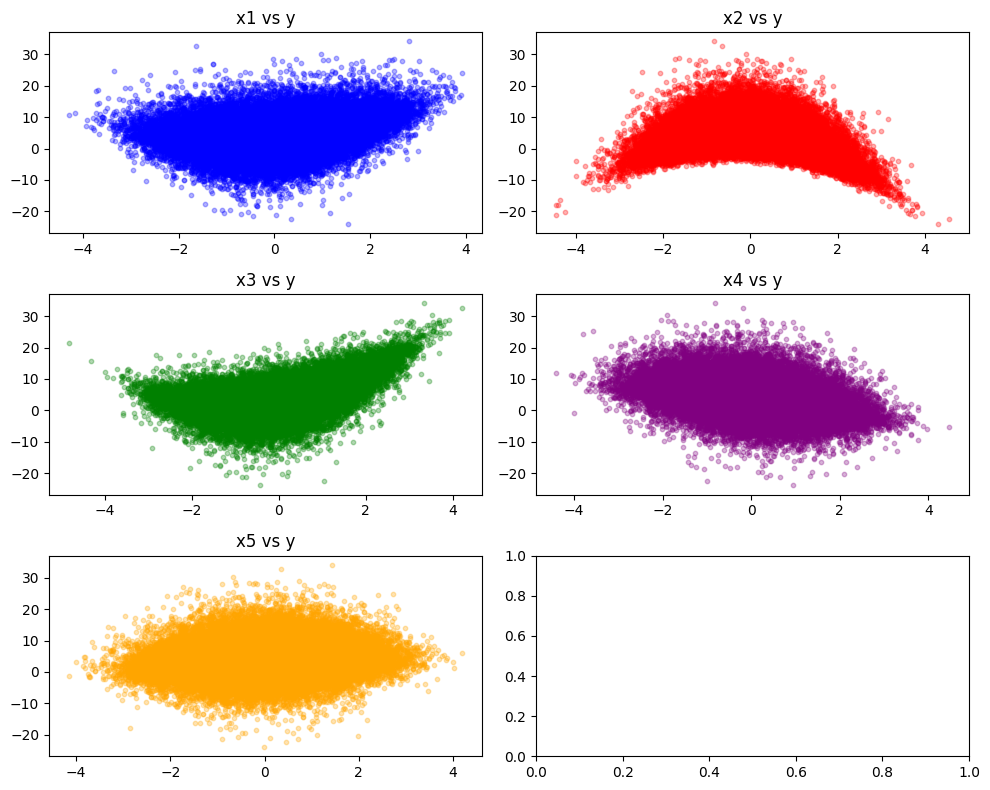

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # 3 filas, 2 columnas

axes[0, 0].scatter(x1, y, color="blue", s=10, alpha=0.3)
axes[0, 0].set_title("x1 vs y")

axes[0, 1].scatter(x2, y, color="red", s=10, alpha=0.3)
axes[0, 1].set_title("x2 vs y")

axes[1, 0].scatter(x3, y, color="green", s=10, alpha=0.3)
axes[1, 0].set_title("x3 vs y")

axes[1, 1].scatter(x4, y, color="purple", s=10, alpha=0.3)
axes[1, 1].set_title("x4 vs y")

axes[2, 0].scatter(x5, y, color="orange", s=10, alpha=0.3)
axes[2, 0].set_title("x5 vs y")

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

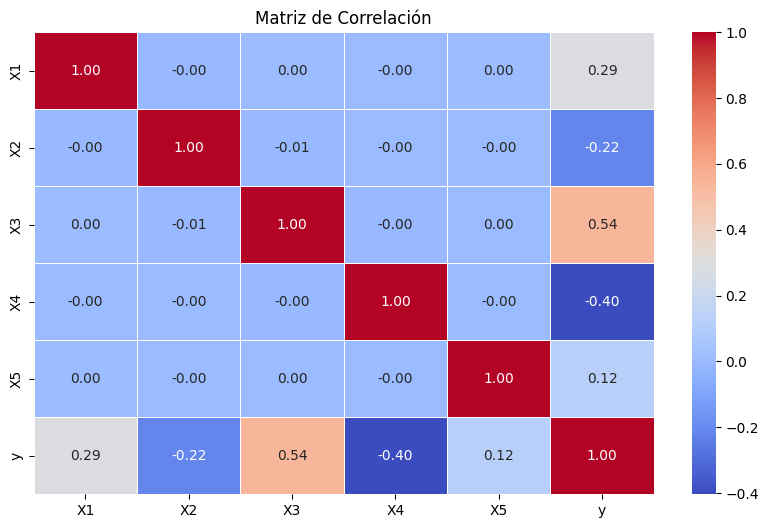

In [27]:
corr_matrix = data.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación")
plt.show()

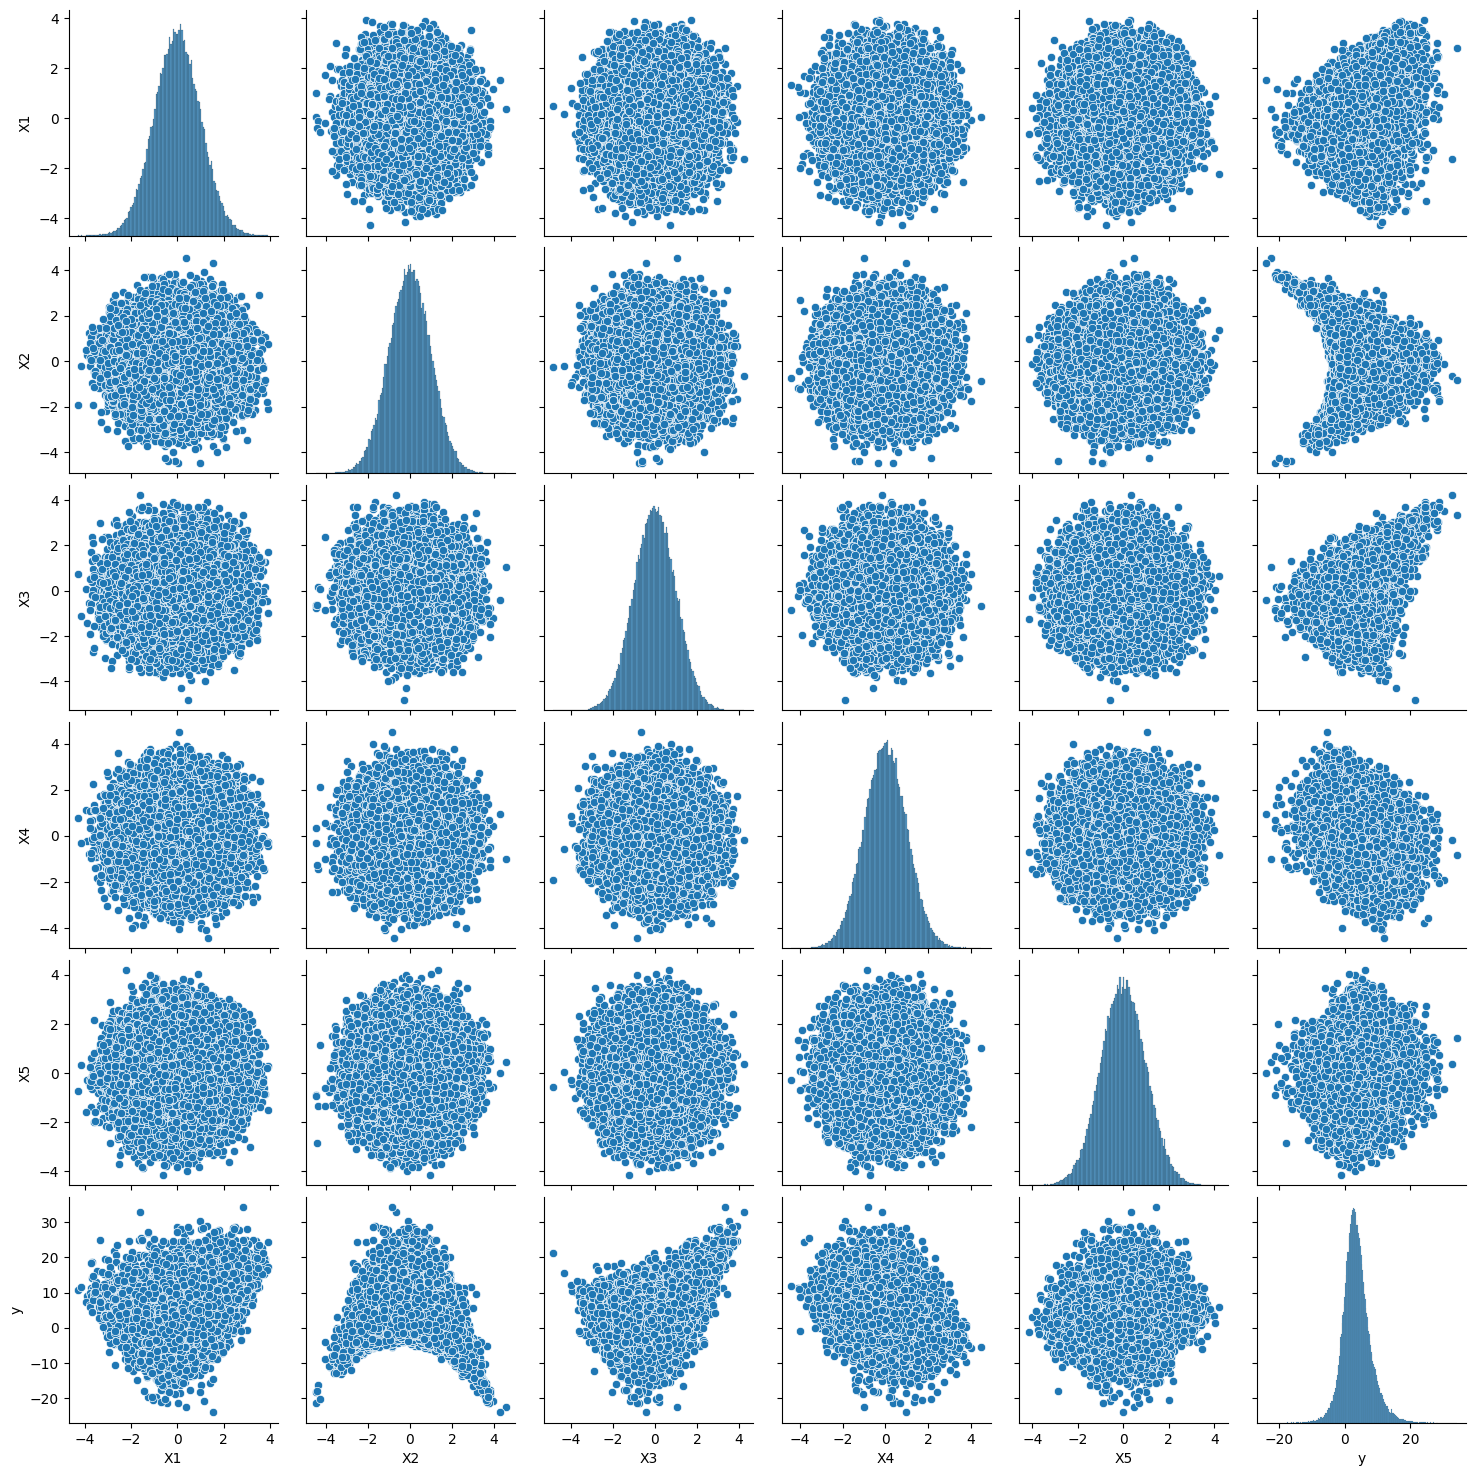

In [28]:
sns.pairplot(data)
plt.show()

# Ecuación Normal

Supongamos que queremos resolver el sistema lineal $Ax = b$, donde $A$ es una matriz de $m\times n$. Supongamos además que $m>n$ y que $b \notin C(A)$. Esto quiere decir que no existe un vector $x \in \mathbb{R}^n$ que satisfaga el sistema. Sin embargo podemos aproximar una "solución" encontrando un vector $\hat{x}$ tal que la distancia entre $A\hat{x}$ y $b$ sea minima.

Formalmente, buscamos un $\hat{x} \in \mathbb{R}^n$ tal que

$$
\hat{x} = \min_{x\in \mathbb{R}^n}||Ax - b||
$$


---

**Teorema:** 
Dado un subespacio $W$ de $\mathbb{R}^n$ y $v \in W$, el vector en $W$ más cercano a $v$ es $\text{proy}_W \, v$. es decir, 
$$
\text{proy}_W \, v = \min_{u \in W} ||v - u||
$$

---


Teniendo en cuenta este teorema, tenemos que el vector $\hat{x}$ que buscamos está dado por

$$
A\hat{x} = \text{proy}_{C(A)} \, b
$$

Por definición de proyección y por el teorema fundamental del álgebra lineal, tenemos que

$$
b - \text{proy}_{C(A)} \, b \in C(A)^{\perp} = N(A^T)
$$

Así, despejamos el vector de interés $\hat{x}$

$$
A\hat{x} = \text{proy}_{C(A)} \, b
$$

$$
\implies b - A\hat{x} = b - \text{proy}_{C(A)} \, b
$$

$$
\implies A^T (b - A\hat{x}) = A^T (b - \text{proy}_{C(A)} \, b)
$$

$$
\implies A^T (b - A\hat{x}) = 0
$$

$$
\implies A^T A\hat{x} = A^T b
$$



Es decir, $\hat{x}$ es una solución de

$$
A^T Ax = A^T b
$$

En el caso de que $A$ sea de rango completo (sus $n$ columnas son linealmente independientes), tenemos que $A^T A$ es invertible. En cuyo caso la solución es única y está dada por 

$$
\hat{x} = (A^T A)^{-1} A^T b
$$

----

## Ventajas de la ecuación normal sobre el gradiente descendente

La ecuación normal y el gradiente descendente son dos métodos usados para resolver problemas de regresión lineal, pero tienen ventajas y desventajas dependiendo del contexto. Aquí están las principales ventajas de la ecuación normal sobre el gradiente descendente:

### 1. **Solución Exacta**
La ecuación normal proporciona una **solución analítica exacta** para el problema de mínimos cuadrados, mientras que el gradiente descendente encuentra una solución aproximada que depende de la tasa de aprendizaje y el número de iteraciones.

### 2. **No depende de hiperparámetros**
El gradiente descendente requiere ajustar la **tasa de aprendizaje** ($\alpha$). Si $\alpha$ es demasiado grande, el algoritmo puede divergir; si es demasiado pequeño, puede ser muy lento.  
La ecuación normal no depende de ningún hiperparámetro.

### 3. **Convergencia instantánea**
La ecuación normal **no requiere iteraciones** como el gradiente descendente.  
Simplemente se calcula $(X^T X)^{-1} X^T y$ y se obtiene la solución directamente.  
El gradiente descendente, en cambio, puede necesitar **muchas iteraciones** para converger.

### 4. **Más estable para conjuntos de datos pequeños**
Cuando $X$ tiene pocas características ($n$ pequeño), la ecuación normal es generalmente más eficiente, ya que la inversión de $X^T X$ es rápida.  
Para conjuntos de datos pequeños o medianos, la ecuación normal suele ser preferida porque **es directa y evita errores de convergencia**.

In [29]:
# Número total de datos
num_datos = data.shape[0]

# Mezclar los índices de los datos
np.random.seed(42)
indices = np.random.permutation(num_datos)

# Separar en 80% entrenamiento y 20% prueba
train_size = int(0.8 * num_datos)  # 80% del total

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Crear los conjuntos de entrenamiento y prueba
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

# Extraer las variables
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values.reshape(-1, 1)

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values.reshape(-1, 1)

In [30]:
print(f"Total de datos: {num_datos}")  
print(f"Tamaño de train_data: {train_data.shape}")  # Debe ser 80% de data
print(f"Tamaño de test_data: {test_data.shape}")    # Debe ser 20% de data
print(f"Tamaño de X_train: {X_train.shape}")  # Debe coincidir con train_data
print(f"Tamaño de X_test: {X_test.shape}")    # Debe coincidir con test_data

Total de datos: 100000
Tamaño de train_data: (80000, 6)
Tamaño de test_data: (20000, 6)
Tamaño de X_train: (80000, 5)
Tamaño de X_test: (20000, 5)


In [31]:
def polynomial_design_matrix(X, degree):
    """
    Genera la matriz de diseño para regresión polinómica usando solo numpy.
    
    Parameters:
    X : ndarray de forma (m, n) con m muestras y n características.
    degree : int, grado máximo del polinomio.
    
    Returns:
    X_poly : ndarray de forma (m, k) con los términos polinómicos hasta el grado especificado.
    """
    m, n = X.shape
    X_poly = [np.ones((m, 1))]  # Incluir término de sesgo

    for d in range(1, degree + 1):
        X_poly.extend([X[:, i:i+1]**d for i in range(n)])

    return np.concatenate(X_poly, axis=1)  # Concatenar en lugar de usar hstack repetido

def mean_squared_error(y_true, y_pred):
    """Calcula el error cuadrático medio (MSE)."""
    y_true = y_true.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    """Calcula el coeficiente de determinación R^2."""
    ss_res = np.sum((y_true - y_pred) ** 2)  # Suma de residuos
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Suma total de cuadrados
    return 1 - (ss_res / ss_tot)

In [ ]:
n = 5  # Grado máximo del polinomio

# Diccionario para almacenar los modelos
models_ec = {}

# Iterar sobre los grados del polinomio (de 1 a n)
for i in range(1, n+1):
    # Construir la matriz de diseño para entrenamiento y prueba
    X_poly_train = polynomial_design_matrix(X_train, i)
    X_poly_test = polynomial_design_matrix(X_test, i)

    # Aplicar la ecuación normal para calcular los coeficientes theta
    theta = (np.linalg.pinv(X_poly_train.T @ X_poly_train) @ X_poly_train.T @ y_train).reshape(-1, 1)

    # Calcular el número de condición
    cond_number = np.linalg.cond(X_poly_train.T @ X_poly_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = X_poly_test @ theta

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Almacenar el modelo en el diccionario
    models_ec[i] = {
        "theta": theta.reshape(-1, 1),  # Asegurar que sea columna
        "cond_number": cond_number,
        "MSE": mse,
        "R2": r2
    }

    # Imprimir los resultados
    print(f"Grado {i}: Número de condición = {cond_number:.2e}, MSE = {mse:.6f}, R^2 = {r2:.4f}")

# Encontrar el modelo con mejor R^2
best_degree = max(models_ec, key=lambda k: models_ec[k]["R2"])
print(f"\nEl mejor modelo según R^2 es el de grado {best_degree} con R^2 = {models_ec[best_degree]['R2']:.4f}")

Grado 1: Número de condición = 1.02e+00, MSE = 7.286715, R^2 = 0.5883
Grado 2: Número de condición = 2.99e+01, MSE = 0.250708, R^2 = 0.9858
Grado 3: Número de condición = 6.12e+01, MSE = 0.250742, R^2 = 0.9858
Grado 4: Número de condición = 1.03e+03, MSE = 0.250766, R^2 = 0.9858
Grado 5: Número de condición = 7.39e+03, MSE = 0.250788, R^2 = 0.9858

El mejor modelo según R^2 es el de grado 2 con R^2 = 0.9858


# Gradiente Descendente

## ¿Por qué es importante normalizar las características?

La normalización de características en el contexto del gradiente descendente se refiere al proceso de escalar las características (columnas de la matriz de datos X) para que tengan una magnitud similar. Esto se hace porque el gradiente descendente puede comportarse de manera ineficiente si las características tienen escalas muy diferentes.

Si las características tienen valores en diferentes órdenes de magnitud, el gradiente descendente puede experimentar los siguientes problemas:

### 1. Convergencia lenta  
- Cuando una característica tiene valores muy grandes y otra muy pequeños, la función de costo tiene contornos alargados (como un valle inclinado).  
- El gradiente tomará pasos pequeños en direcciones de pendiente suave y pasos grandes en direcciones de pendiente pronunciada, lo que hace que la convergencia sea muy lenta.  

### 2. Divergencia del algoritmo  
- Si la tasa de aprendizaje ($\alpha$) es demasiado grande para algunas características, el gradiente descendente puede oscilar o incluso divergir.  

### 3. Facilita la elección de la tasa de aprendizaje $\alpha$
- Con datos normalizados, los valores de las derivadas parciales son más uniformes, lo que permite usar una única tasa de aprendizaje efectiva para todas las características.  

In [33]:
# Normalizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.iloc[:, :-1].values)
X_test = scaler.transform(test_data.iloc[:, :-1].values)

y_train = train_data.iloc[:, -1].values.reshape(-1, 1)
y_test = test_data.iloc[:, -1].values.reshape(-1, 1)

In [34]:
def gradient_descent(X, y, alpha=0.01, tol=1e-6, max_iterations=1000):
    """
    Gradiente descendente con parada temprana por convergencia.
    
    Parámetros:
    X : ndarray (m, n) - Matriz de diseño
    y : ndarray (m, 1) - Variable objetivo
    alpha : float - Tasa de aprendizaje
    tol : float - Tolerancia para detectar convergencia
    max_iterations : int - Número máximo de iteraciones
    
    Retorna:
    theta : ndarray (n, 1) - Coeficientes ajustados
    history : lista - Historial de costos
    """
    m, n = X.shape
    theta = np.zeros((n, 1))  # Inicializar en ceros
    history = []  # Para almacenar el historial de costos
    y = y.reshape(-1, 1)  # Asegura que y tenga la forma (m,1)
    prev_cost = float('inf')
    
    for i in range(max_iterations):
        y_pred = X @ theta  # Predicciones
        error = y_pred - y  # Error
        gradient = (1/m) * (X.T @ error)  # Gradiente
        theta -= alpha * gradient  # Actualización de theta
        
        # Calcular el costo actual
        cost = mean_squared_error(y, y_pred)
        history.append(cost)
        
        # Criterio de parada: si el costo cambia muy poco, detener iteraciones
        if abs(prev_cost - cost) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones.")
            break
        
        prev_cost = cost
    
    return theta, history

In [35]:
n = 5  # Grado máximo del polinomio
alpha = 0.01  # Tasa de aprendizaje
max_iterations = 1000  # Número de iteraciones

# Diccionario para almacenar los modelos
models_gd = {}

# Iterar sobre los grados del polinomio (de 1 a n)
for i in range(1, n+1):
    # Construir la matriz de diseño para entrenamiento y prueba
    X_poly_train = polynomial_design_matrix(X_train, i)
    X_poly_test = polynomial_design_matrix(X_test, i)

    # 🔹 Normalizar la matriz de diseño polinómica
    scaler = StandardScaler()
    X_poly_train = scaler.fit_transform(X_poly_train)
    X_poly_test = scaler.transform(X_poly_test)  # Transformar con los parámetros de entrenamiento

    # Ajustar el modelo con gradiente descendente
    theta, cost_history = gradient_descent(X_poly_train, y_train, alpha, tol=1e-6, max_iterations=max_iterations)

    # Hacer predicciones en el conjunto de prueba
    y_pred = X_poly_test @ theta

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Almacenar el modelo en el diccionario
    models_gd[i] = {
        "theta": theta,
        "MSE": mse,
        "R2": r2,
        "cost_history": cost_history
    }

    # Imprimir los resultados
    print(f"Grado {i}: MSE = {mse:.4f}, R^2 = {r2:.4f}")

# Encontrar el modelo con mejor R^2
best_degree = max(models_gd, key=lambda k: models_gd[k]["R2"])
print(f"\nEl mejor modelo según R^2 es el de grado {best_degree} con R^2 = {models_gd[best_degree]['R2']:.4f}")

Convergencia alcanzada en 606 iteraciones.
Grado 1: MSE = 20.3392, R^2 = -0.1493
Convergencia alcanzada en 638 iteraciones.
Grado 2: MSE = 13.1691, R^2 = 0.2559
Grado 3: MSE = 13.1796, R^2 = 0.2553
Grado 4: MSE = 13.2186, R^2 = 0.2531
Grado 5: MSE = 13.2300, R^2 = 0.2524

El mejor modelo según R^2 es el de grado 2 con R^2 = 0.2559


## Ventajas del Gradiente Descendente sobre la Ecuación Normal  

1. **Escalabilidad**: El gradiente descendente tiene una complejidad **\(O(kn)\)**, mientras que la ecuación normal tiene **\(O(n^3)\)**, lo que lo hace más eficiente para grandes conjuntos de datos.  

2. **Evita la inversión de matrices**: No sufre problemas numéricos por matrices **singulares o mal condicionadas**.  

3. **Aplicable a modelos más complejos**: Se usa en **redes neuronales, regresión logística y otros modelos** donde no hay solución analítica.

# Comparación de los Modelos

In [36]:
# Diccionario para almacenar resultados
comparison = {}

# Evaluar modelos
for i in range(1, n+1):

    X_poly_test = polynomial_design_matrix(X_test, i)
    
    theta_gd = models_gd[i]["theta"]
    theta_ne = models_ec[i]["theta"]

    if theta_gd.shape[0] != X_poly_test.shape[1]:
        theta_gd = theta_gd.reshape(-1, 1)  # Asegurar que sea un vector columna

    if theta_ne.shape[0] != X_poly_test.shape[1]:
        theta_ne = theta_ne.reshape(-1, 1)  # Asegurar que sea un vector columna

    y_pred_gd = X_poly_test @ theta_gd
    y_pred_ne = X_poly_test @ theta_ne

    # Calcular MSE
    mse_gd = mean_squared_error(y_test, y_pred_gd)
    mse_ne = mean_squared_error(y_test, y_pred_ne)

    # Calcular R^2
    r2_gd = r2_score(y_test, y_pred_gd)
    r2_ne = r2_score(y_test, y_pred_ne)

    # Guardar resultados
    comparison[i] = {
        "MSE_gradiente": mse_gd,
        "MSE_normal": mse_ne,
        "R2_gradiente": r2_gd,
        "R2_normal": r2_ne
    }

    print(f"Grado {i}: MSE GD = {mse_gd:.4f}, MSE NE = {mse_ne:.4f}, R^2 GD = {r2_gd:.4f}, R^2 NE = {r2_ne:.4f}")

Grado 1: MSE GD = 20.3392, MSE NE = 7.2870, R^2 GD = -0.1493, R^2 NE = 0.5882
Grado 2: MSE GD = 8.9521, MSE NE = 0.2509, R^2 GD = 0.4942, R^2 NE = 0.9858
Grado 3: MSE GD = 9.2599, MSE NE = 0.2510, R^2 GD = 0.4768, R^2 NE = 0.9858
Grado 4: MSE GD = 21.4588, MSE NE = 0.2510, R^2 GD = -0.2125, R^2 NE = 0.9858
Grado 5: MSE GD = 97.9379, MSE NE = 0.2510, R^2 GD = -4.5340, R^2 NE = 0.9858


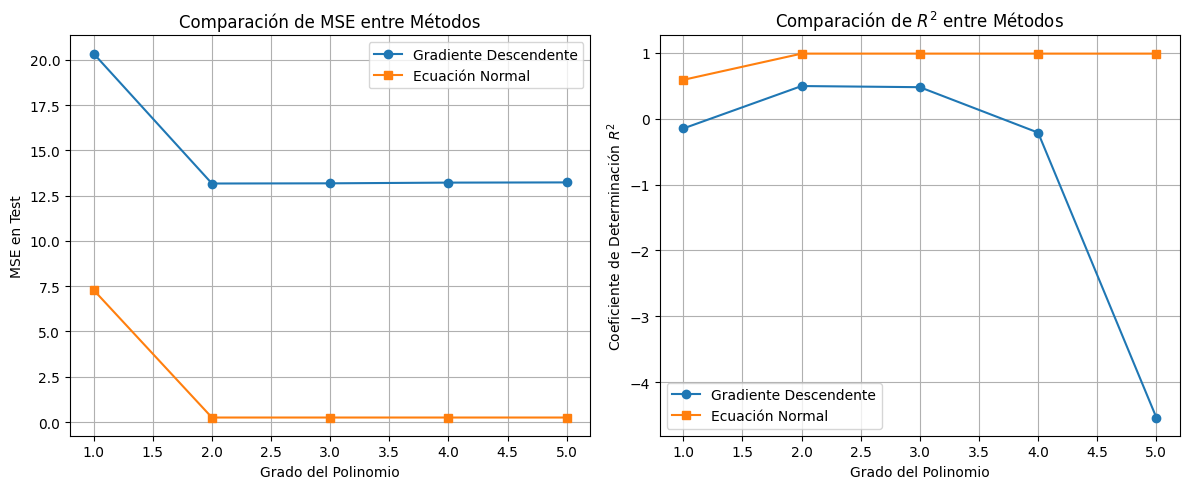

In [37]:
import matplotlib.pyplot as plt

# Obtener MSE y R^2 de cada modelo
degrees = list(models_gd.keys())

mse_gd = [models_gd[d]["MSE"] for d in degrees]
mse_ne = [models_ec[d]["MSE"] for d in degrees]

r2_gd = [r2_score(y_test, polynomial_design_matrix(X_test, d) @ models_gd[d]["theta"]) for d in degrees]
r2_ne = [r2_score(y_test, polynomial_design_matrix(X_test, d) @ models_ec[d]["theta"]) for d in degrees]

# Crear figuras
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Graficar MSE
ax[0].plot(degrees, mse_gd, label="Gradiente Descendente", marker="o")
ax[0].plot(degrees, mse_ne, label="Ecuación Normal", marker="s")
ax[0].set_xlabel("Grado del Polinomio")
ax[0].set_ylabel("MSE en Test")
ax[0].set_title("Comparación de MSE entre Métodos")
ax[0].legend()
ax[0].grid()

# Graficar R^2
ax[1].plot(degrees, r2_gd, label="Gradiente Descendente", marker="o")
ax[1].plot(degrees, r2_ne, label="Ecuación Normal", marker="s")
ax[1].set_xlabel("Grado del Polinomio")
ax[1].set_ylabel("Coeficiente de Determinación $R^2$")
ax[1].set_title("Comparación de $R^2$ entre Métodos")
ax[1].legend()
ax[1].grid()

# Mostrar gráficas
plt.tight_layout()
plt.show()

## Validación Cruzada (k-Folds)

La **validación cruzada** es una técnica para evaluar el rendimiento de un modelo y evitar el sobreajuste. Consiste en dividir los datos en múltiples subconjuntos (**folds**) y entrenar el modelo varias veces para obtener una estimación más confiable.  

### ¿Cómo funciona?  
1. Se divide el conjunto de datos en **\(k\)** partes de tamaño similar.  
2. Se entrena el modelo \(k\) veces, usando \(k-1\) folds para entrenamiento y 1 fold para prueba.  
3. Se calcula el **promedio de las métricas** obtenidas en cada iteración.  

In [41]:
from sklearn.model_selection import KFold
import numpy as np

# Parámetros
n_folds = 5  # Número de folds
n_max = 5  # Grado máximo del polinomio
alpha = 0.01  # Tasa de aprendizaje
max_iterations = 1000  # Iteraciones máximas

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Diccionarios para almacenar resultados promedio
results_gd = {i: {"MSE": [], "R2": []} for i in range(1, n_max + 1)}
results_ne = {i: {"MSE": [], "R2": []} for i in range(1, n_max + 1)}

# Validación cruzada
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    for i in range(1, n_max + 1):
        # Generar matriz de diseño polinómica
        X_poly_train = polynomial_design_matrix(X_train_fold, i)
        X_poly_val = polynomial_design_matrix(X_val_fold, i)

        # 🔹 Normalizar la matriz de diseño polinómica
        scaler = StandardScaler()
        X_poly_train = scaler.fit_transform(X_poly_train)
        X_poly_val = scaler.transform(X_poly_val)

        # **Gradiente Descendente**
        theta_gd, _ = gradient_descent(X_poly_train, y_train_fold, alpha, tol=1e-6, max_iterations=max_iterations)
        y_pred_gd = X_poly_val @ theta_gd
        results_gd[i]["MSE"].append(mean_squared_error(y_val_fold, y_pred_gd))
        results_gd[i]["R2"].append(r2_score(y_val_fold, y_pred_gd))

        # **Ecuación Normal**
        theta_ne = np.linalg.pinv(X_poly_train.T @ X_poly_train) @ X_poly_train.T @ y_train_fold
        y_pred_ne = X_poly_val @ theta_ne
        results_ne[i]["MSE"].append(mean_squared_error(y_val_fold, y_pred_ne))
        results_ne[i]["R2"].append(r2_score(y_val_fold, y_pred_ne))

# Calcular promedios por cada grado del polinomio
avg_results_gd = {i: {"MSE": np.mean(results_gd[i]["MSE"]), "R2": np.mean(results_gd[i]["R2"])} for i in range(1, n_max + 1)}
avg_results_ne = {i: {"MSE": np.mean(results_ne[i]["MSE"]), "R2": np.mean(results_ne[i]["R2"])} for i in range(1, n_max + 1)}

# Mostrar resultados
print("\nResultados promedio de validación cruzada (Gradiente Descendente):")
for i in avg_results_gd:
    print(f"Grado {i}: MSE = {avg_results_gd[i]['MSE']:.4f}, R^2 = {avg_results_gd[i]['R2']:.4f}")

print("\nResultados promedio de validación cruzada (Ecuación Normal):")
for i in avg_results_ne:
    print(f"Grado {i}: MSE = {avg_results_ne[i]['MSE']:.4f}, R^2 = {avg_results_ne[i]['R2']:.4f}")

# Encontrar mejor grado según R^2
best_degree_gd = max(avg_results_gd, key=lambda k: avg_results_gd[k]["R2"])
best_degree_ne = max(avg_results_ne, key=lambda k: avg_results_ne[k]["R2"])

print(f"\nMejor grado según R^2 (Gradiente Descendente): {best_degree_gd}, R^2 = {avg_results_gd[best_degree_gd]['R2']:.4f}")
print(f"Mejor grado según R^2 (Ecuación Normal): {best_degree_ne}, R^2 = {avg_results_ne[best_degree_ne]['R2']:.4f}")

Convergencia alcanzada en 606 iteraciones.
Convergencia alcanzada en 639 iteraciones.
Convergencia alcanzada en 608 iteraciones.
Convergencia alcanzada en 637 iteraciones.
Convergencia alcanzada en 607 iteraciones.
Convergencia alcanzada en 639 iteraciones.
Convergencia alcanzada en 606 iteraciones.
Convergencia alcanzada en 639 iteraciones.
Convergencia alcanzada en 604 iteraciones.
Convergencia alcanzada en 636 iteraciones.

Resultados promedio de validación cruzada (Gradiente Descendente):
Grado 1: MSE = 20.2808, R^2 = -0.1254
Grado 2: MSE = 13.2128, R^2 = 0.2667
Grado 3: MSE = 13.2260, R^2 = 0.2660
Grado 4: MSE = 13.2613, R^2 = 0.2640
Grado 5: MSE = 13.2723, R^2 = 0.2634

Resultados promedio de validación cruzada (Ecuación Normal):
Grado 1: MSE = 20.2807, R^2 = -0.1254
Grado 2: MSE = 13.2128, R^2 = 0.2667
Grado 3: MSE = 13.2127, R^2 = 0.2667
Grado 4: MSE = 13.2129, R^2 = 0.2667
Grado 5: MSE = 13.2129, R^2 = 0.2667

Mejor grado según R^2 (Gradiente Descendente): 2, R^2 = 0.2667
Mejo

## Ventajas de la Validación Cruzada sobre Train-Test Split  

La **validación cruzada** es más robusta que la división simple de datos en entrenamiento y prueba. Sus principales ventajas son:  

### **1. Mejor uso de los datos**  
- En **train-test split**, parte de los datos solo se usa para prueba.  
- En **validación cruzada**, todos los datos se usan para entrenar y evaluar, maximizando la información disponible.  

### **2. Evaluaciones más confiables**  
- Un único **train-test split** puede dar resultados sesgados.  
- La validación cruzada prueba el modelo en múltiples particiones, reduciendo la variabilidad y evitando sobreajuste.  

### **3. Comparación más justa entre modelos**  
- La validación cruzada garantiza que todos los modelos sean evaluados en distintos subconjuntos, evitando sesgos en la comparación. 

# Conclusiones sobre los resultados  

## ¿Qué modelo tiene mejor desempeño?  

### Comparación de métodos (Gradiente Descendente vs. Ecuación Normal)  
- La ecuación normal logra un \( R^2 \) alto (~0.9858) en el conjunto de prueba para grados **≥ 2**.  
- En validación cruzada, \( R^2 \) se mantiene estable (~0.2667) a partir de grado **2 en adelante**.  
- Gradiente descendente tiene un desempeño mucho peor, con valores de \( R^2 \) bajos o negativos y un MSE mucho mayor.  

Conclusión:  
La ecuación normal es el mejor método, ya que logra un ajuste significativamente mejor que el gradiente descendente.  

---

### ¿Cuál es el mejor grado del polinomio?  
#### Según el conjunto de prueba:  
- Grado 2 a 5 con ecuación normal logran el mejor \( R^2 \) (~0.9858) y un MSE bajísimo (~0.2510).  
- En gradiente descendente, el mejor grado es 2 (\( R^2 = 0.4942 \)), pero sigue siendo inferior a ecuación normal.  

#### Según validación cruzada:  
- En ecuación normal, todos los grados ≥ 2 tienen un rendimiento idéntico (\( R^2 \approx 0.2667 \), MSE estable).  
- En gradiente descendente, el mejor grado es 2 (\( R^2 = 0.2667 \)), pero sigue siendo inestable.  

Conclusión:  
- Si se busca mejor ajuste en prueba, el grado 2 en ecuación normal ya logra un \( R^2 \) alto sin riesgo de sobreajuste.  
- Si se prioriza validación cruzada, cualquier grado ≥ 2 en ecuación normal es equivalente.  

---

## Conclusión Final  
El mejor modelo es la ecuación normal con polinomio de grado 2.  
Gradiente descendente no es recomendable en este caso, ya que tiene peor \( R^2 \) y mayor MSE. 